# EM27+Met Figure Creator/Explorer
This notebook provides functionality for loading and visualizing EM27 data from .oof files and meteorological data from mesowest data.

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import os
import itertools
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib
from textwrap import fill
from herbie import Herbie
import pickle
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import pysolar.solar as solar
from geographiclib.geodesic import Geodesic
import xarray as xr
import pytz

import sys
sys.path.append('..')
import funcs.ac_funcs as ac
import funcs.plotting as plotting
from config import run_config

import simplekml

pd.options.mode.chained_assignment = None

#Autoreload changed local modules
%load_ext autoreload
%autoreload 2

In [2]:
# Define paths for both figures and pickled files. 
figures_path = '/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Figures/'
pickle_data_path = '/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/Pickled_files/'

# Full EM27 Data Figure
Loads EM27 data for a daterange, does necessary resampling, creates (and saves, if desired) a figure. 

In [3]:
#Loading the full dataset can take a while
#em27_data_folder = "/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/EM27_oof/SLC_EM27_ha_2022_2023_oof_v2_nasrin_correct/"
em27_data_folder = "/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/EM27_oof/ha_new/"
dt1_str = '2022-05-23 00:00:00' #Start Datetime
dt2_str =  '2024-05-01 00:00:00' #End Datetime
tz = 'US/Mountain' #Timezone to load the data into

oof_manage = ac.oof_manager(em27_data_folder,tz) #setup the oof manager
flag0_em27_df = oof_manage.load_oof_df_inrange(dt1_str,dt2_str,filter_flag_0=True,print_out=True,cols_to_load=None) #load the dataframe for inrange data

Loading ha20220602.vav.ada.aia.oof
Loading ha20220603.vav.ada.aia.oof
Loading ha20220605.vav.ada.aia.oof
Loading ha20220606.vav.ada.aia.oof
Loading ha20220607.vav.ada.aia.oof
Loading ha20220609.vav.ada.aia.oof
Loading ha20220614.vav.ada.aia.oof
Loading ha20220615.vav.ada.aia.oof
Loading ha20220617.vav.ada.aia.oof
Loading ha20220620.vav.ada.aia.oof
Loading ha20220621.vav.ada.aia.oof
Loading ha20220622.vav.ada.aia.oof
Loading ha20220623.vav.ada.aia.oof
Loading ha20220624.vav.ada.aia.oof
Loading ha20220625.vav.ada.aia.oof
Loading ha20220627.vav.ada.aia.oof
Loading ha20220628.vav.ada.aia.oof
Loading ha20220701.vav.ada.aia.oof
Loading ha20220706.vav.ada.aia.oof
Loading ha20220707.vav.ada.aia.oof
Loading ha20220708.vav.ada.aia.oof
Loading ha20220709.vav.ada.aia.oof
Loading ha20220711.vav.ada.aia.oof
Loading ha20220712.vav.ada.aia.oof
Loading ha20220718.vav.ada.aia.oof
Loading ha20220719.vav.ada.aia.oof
Loading ha20220720.vav.ada.aia.oof
Loading ha20220726.vav.ada.aia.oof
Loading ha20220727.v

In [4]:
em27_resample_interval = '5T' #set the resample interval if reqired (e.g. '5T' is five minute resample). Use None for no resample
if em27_resample_interval == None:
    em27_resampled = flag0_em27_df.copy()
else:
    em27_resampled = flag0_em27_df.resample(em27_resample_interval).mean(numeric_only=True).dropna()

/tmp/ipykernel_1275901/2508775819.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  em27_resampled = flag0_em27_df.resample(em27_resample_interval).mean(numeric_only=True).dropna()


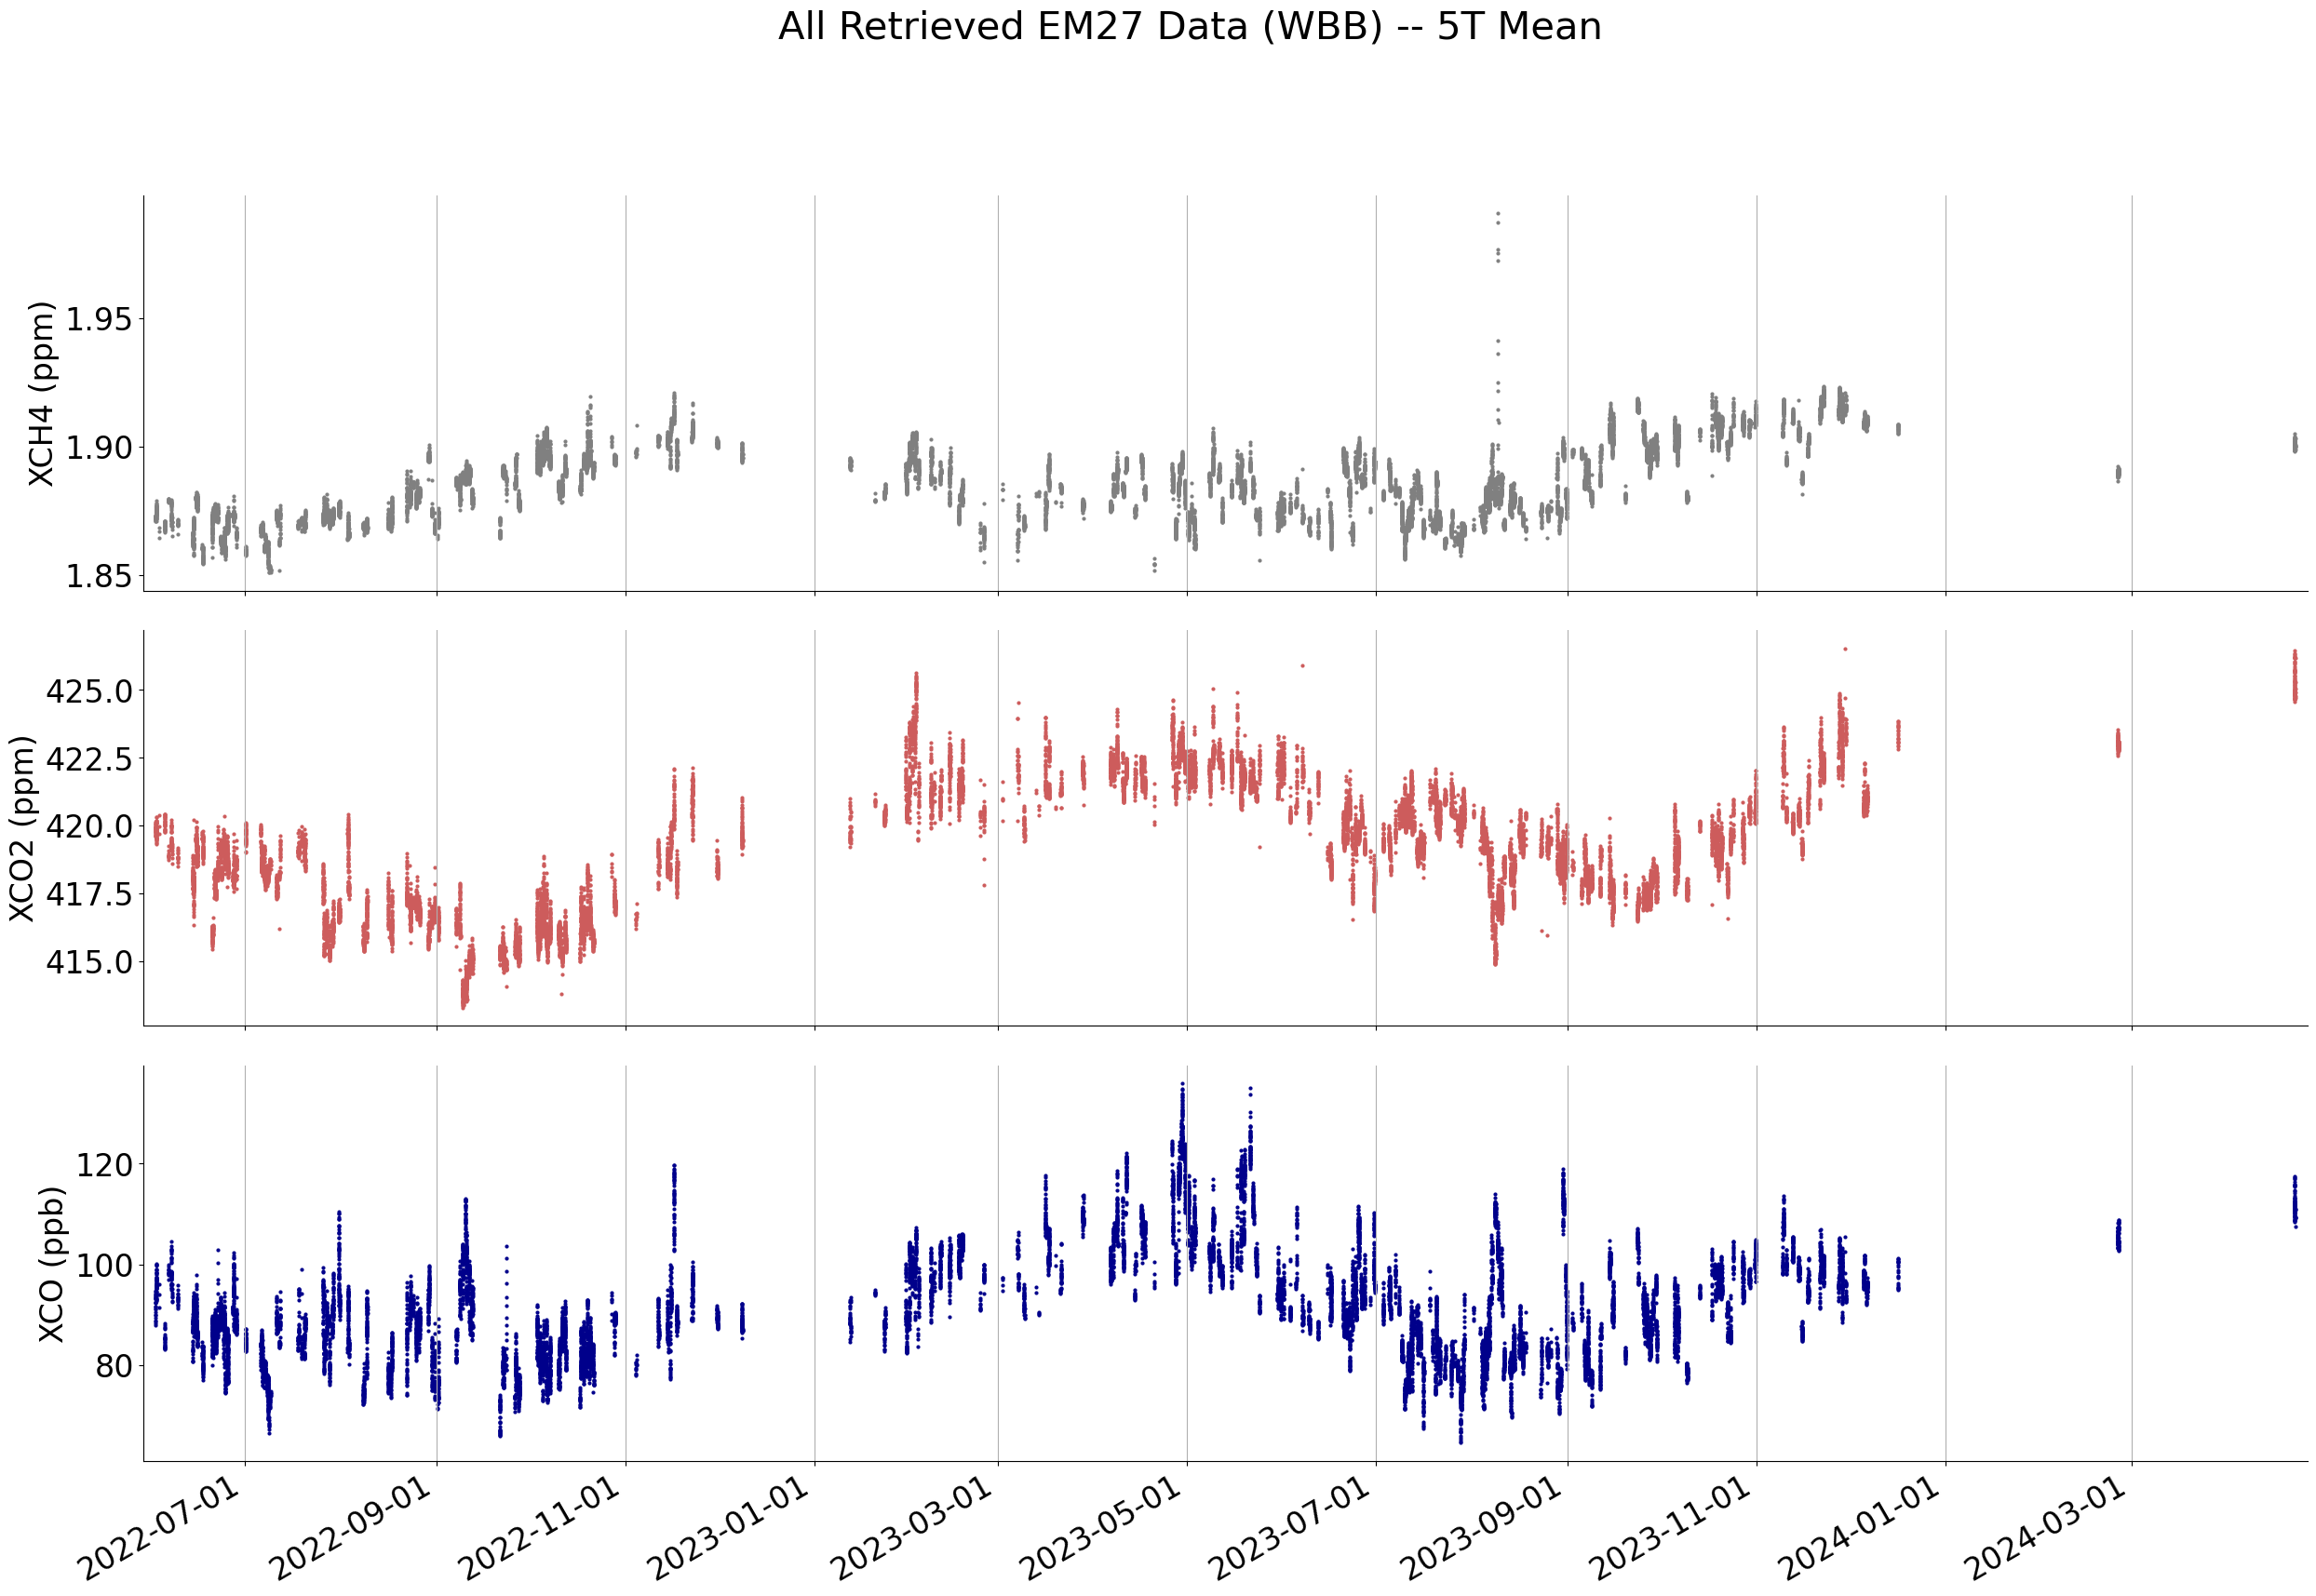

In [6]:
fig_id = 'all_wbb_xch4_xco2_xco_ts' #Set the figure id
savefig = False #define if you want to save

fig,axes = plt.subplots(3,1,figsize = (30,20))
fig.suptitle(f'All Retrieved EM27 Data (WBB) -- {em27_resample_interval} Mean',fontsize = 30)
labsize = 24
marker_size = 4

xlims = [em27_resampled.index[0]-datetime.timedelta(days=4),em27_resampled.index[-1]+datetime.timedelta(days=4)]

axes[0].scatter(em27_resampled.index,em27_resampled['xch4(ppm)'],color = 'grey',s=marker_size)
axes[0].tick_params(labelsize = labsize)
axes[0].set_ylabel('XCH4 (ppm)',size = labsize)
axes[0].set_xlim(xlims)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].xaxis.grid(True)

axes[1].scatter(em27_resampled.index,em27_resampled['xco2(ppm)'],color = 'indianred',s=marker_size)
axes[1].tick_params(labelsize = labsize)
axes[1].set_ylabel('XCO2 (ppm)',size = labsize)
axes[1].set_xlim(xlims)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].xaxis.grid(True)

axes[2].scatter(em27_resampled.index,em27_resampled['xco(ppb)'],color = 'darkblue',s=marker_size)
axes[2].tick_params(labelsize = labsize)
axes[2].set_ylabel('XCO (ppb)',size = labsize)
axes[2].set_xlim(xlims)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].xaxis.grid(True)
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d', tz = em27_resampled.index.tz))

plt.subplots_adjust(hspace=0.1)
plt.gcf().autofmt_xdate()
plt.show()

if savefig:
    fig_name = f'{fig_id}.png'
    fig.savefig(os.path.join(figures_path,fig_name),dpi=500)


# Interesting Days Finder
This is some functionality to loop through and find interesting days individually. You can then make notes and save a dictionary to access those interesting days later. 

In [ ]:
#Define a plotting function for met and em27 data together
def plotly_em27_met(em27_df,met_df):
    #xlims = [em27_df.index[0]-datetime.timedelta(hours=1),em27_df.index[-1]+datetime.timedelta(hours=1)]
    xlims= [datetime.datetime.combine(em27_resampled.index[0].date(),datetime.time(hour=6)),
            datetime.datetime.combine(em27_resampled.index[-1].date(),datetime.time(hour=22))]
    fig = make_subplots(rows = 5,shared_xaxes=True,row_heights = [2,2,2,1,1],vertical_spacing=0.02)
    fig.add_trace(go.Scatter(
            x = em27_df.index,
            y = em27_df['xch4(ppm)'],
            error_y = dict(
                type='data', # value of error bar given in data coordinates
                array=em27_df['xch4(ppm)_error'],
                visible=True,
                color = 'grey',
                width = 0.5),
            mode='markers',
            marker={'color':'black'},
        ),row=1,col=1)
    fig.update_yaxes(row=1,col=1,title_text = 'XCH4 (ppm)')

    fig.add_trace(go.Scatter(
            x = em27_df.index,
            y = em27_df['xco2(ppm)'],
            error_y = dict(
                type='data', # value of error bar given in data coordinates
                array=em27_df['xco2(ppm)_error'],
                visible=True,
                color = 'grey',
                width = 0.5),
            mode='markers',
            marker={'color':'red'},
        ),row=2,col=1)
    fig.update_yaxes(row=2,col=1,title_text = 'XCO2 (ppm)')

    fig.add_trace(go.Scatter(
            x = em27_df.index,
            y = em27_df['xco(ppb)'],
            error_y = dict(
                type='data', # value of error bar given in data coordinates
                array=em27_df['xco(ppb)_error'],
                visible=True,
                color = 'grey',
                width = 0.5),
            mode='markers',
            marker={'color':'blue'}
        ),row=3,col=1)
    fig.update_yaxes(row=3,col=1,title_text = 'XCO (ppm)')

    fig.add_trace(go.Scatter(
            x = met_df.index,
            y = met_df['ws'],
            mode='markers',
            marker={'color':'black'}
        ),row=4,col=1)
    fig.update_yaxes(row=4,col=1,title_text = 'WS (m/s)')

    fig.add_trace(go.Scatter(
            x = met_df.index,
            y = met_df['wd'],
            mode='markers',
            marker={'color':'black'}
        ),row=5,col=1)
    fig.update_yaxes(row=5,col=1,title_text = 'WD (deg)')

    fig.update_layout(
        xaxis_range=xlims,
        height=800,
        #yaxis2 = dict(range=[10,90]),
        yaxis5 = dict(range=[0,360])
    )
    fig.update(layout_showlegend=False)
    fig.show()

In [ ]:
em27_data_folder = "/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/EM27_oof/SLC_EM27_ha_2022_2023_oof_v2_nasrin_correct"

tz = 'US/Mountain'

oof_manage = ac.oof_manager(em27_data_folder,tz)
oof_files = oof_manage.get_sorted_oof()
oof_dates = [oof_manage.date_from_oof(fname) for fname in oof_files]

oof_dt_ranges = []
for oof_date in oof_dates:
    dt1_str = f"{oof_date.strftime('%Y-%m-%d')} 00:00:00"
    dt2_str = f"{oof_date.strftime('%Y-%m-%d')} 23:59:59"
    oof_dt_ranges.append({'dt1':oof_manage.tzdt_from_str(dt1_str),'dt2':oof_manage.tzdt_from_str(dt2_str)})

In [ ]:
interesting_dtranges = {} 
oof_dt_idx = -1

In [ ]:
oof_dt_idx += 1

dt_range = oof_dt_ranges[oof_dt_idx]
oof_manage = ac.oof_manager(em27_data_folder,tz)
flag0_em27_df = oof_manage.load_oof_df_inrange(dt_range['dt1'],dt_range['dt2'],True)

#Met data from WBB in situ
daily_met_path = '/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/met/wbb/daily_txt_gggformat'
met_loader = ac.met_loader_ggg(daily_met_path)
met_df = met_loader.load_data_inrange(dt_range['dt1'],dt_range['dt2'])

em27_resample_interval = None
met_resample_interval = None

if em27_resample_interval == None:
    em27_resampled = flag0_em27_df.copy()
else:
    em27_resampled = flag0_em27_df.resample(em27_resample_interval).mean(numeric_only=True).dropna(how='all')

if met_resample_interval == None:
    met_resampled = met_df.copy()
else:
    met_resampled = met_df.resample(met_resample_interval).mean(numeric_only=True).dropna(how='all')
met_resampled['ws'],met_resampled['wd'] = np.vectorize(ac.uv_to_wdws)(met_resampled['u'],met_resampled['v'])

plotly_em27_met(em27_resampled,met_resampled)

In [ ]:
#Run this if the above is an interesting day. Will save (overwrite) the file, so be careful
comments = 'Coincident CH4, CO2, CO and wind speed/direction feature'

interesting_dtranges[dt_range['dt1'].strftime('%Y%m%d')] = {'dt_range':dt_range,
                                                             'comments':comments}
filename = 'interesting_dtrangedict_list.pkl'
with open(os.path.join(pickle_data_path,filename),'wb') as f:
    pickle.dump(interesting_dtranges,f)

# Interesting Days Figures

In [ ]:
def mpl_interesting_plotter(em27_df,met_df,before_hours = 1,after_hours = 3):

    fig,axes = plt.subplots(5,1,figsize = (30,25),height_ratios=[2,2,2,1,1])
    labsize = 33

    for col in em27_df.columns:
        em27_df[col] =  pd.to_numeric(em27_df[col],errors='coerce')
    em27_df_rolling = em27_df.rolling(datetime.timedelta(hours=1),center=True).mean()

    xlims = [em27_df.index[0]-datetime.timedelta(hours=before_hours),em27_df.index[-1]+datetime.timedelta(hours=after_hours)]

    species = 'xch4(ppm)'
    axes[0].scatter(em27_df.index,em27_df[species],color = 'grey',zorder=3,label='True Data Rate')
    axes[0].errorbar(em27_df.index,em27_df[species],
                    yerr=em27_df[f'{species}_error'],ls='none',
                    ecolor='grey',alpha=0.2)
    axes[0].plot(em27_df_rolling.index,em27_df_rolling[species],color='black',zorder=4,label='1H Rolling Mean')
    axes[0].tick_params(labelsize = labsize)
    axes[0].set_ylabel(species,size = labsize)
    axes[0].set_xlim(xlims)
    axes[0].xaxis.grid(True)
    axes[0].legend(fontsize = labsize *0.8)

    species = 'xco2(ppm)'
    axes[1].scatter(em27_df.index,em27_df[species],color = 'indianred',zorder=3)
    axes[1].errorbar(em27_df.index,em27_df[species],
                    yerr=em27_df[f'{species}_error'],ls='none',
                    ecolor='grey')
    axes[1].plot(em27_df_rolling.index,em27_df_rolling[species],color='darkred',zorder=4)
    axes[1].tick_params(labelsize = labsize)
    axes[1].set_ylabel(species,size = labsize)
    axes[1].set_xlim(xlims)
    axes[1].xaxis.grid(True)
    axes[1].plot([],[],alpha = 0,label=f"{fill(interesting['comments'], 20)}")
    leg = axes[1].legend(fontsize = labsize*0.7)
    leg.set_title('Comments',prop={'size':labsize})


    species = 'xco(ppb)'
    axes[2].scatter(em27_df.index,em27_df[species],color = 'dodgerblue',zorder=3)
    axes[2].errorbar(em27_df.index,em27_df[species],
                    yerr=em27_df[f'{species}_error'],ls='none',
                    ecolor='grey')
    axes[2].plot(em27_df_rolling.index,em27_df_rolling[species],color='darkblue',zorder=4)
    axes[2].tick_params(labelsize = labsize)
    axes[2].set_ylabel(species,size = labsize)
    axes[2].set_xlim(xlims)
    axes[2].xaxis.grid(True)


    axes[3].scatter(met_df.index,met_df['ws'],color = 'black')
    axes[3].tick_params(labelsize = labsize)
    axes[3].set_ylabel('ws (m/s)',size = labsize)
    axes[3].set_xlim(xlims)
    axes[3].xaxis.grid(True)

    # axes[3].spines['top'].set_visible(False)
    # axes[3].spines['right'].set_visible(False)

    axes[4].scatter(met_df.index,met_df['wd'],color = 'black')
    axes[4].set_yticks([0,90,180,270,360])
    axes[4].tick_params(labelsize = labsize)
    axes[4].set_ylabel('wd',size = labsize)
    axes[4].set_xlim(xlims)
    axes[4].xaxis.grid(True)
    # axes[4].spines['top'].set_visible(False)
    # axes[4].spines['right'].set_visible(False)

    axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %Z', tz = em27_df.index.tz))
    axes[4].set_xlabel(em27_df.index[0].strftime('%b %d, %Y'),size = labsize)

    plt.subplots_adjust(hspace=0.2)
    plt.gcf().autofmt_xdate()

    plt.show()
    return fig


In [ ]:
# Interesting dates from saved picklefile
filename = 'interesting_dtrangedict_list.pkl'
with open(os.path.join(pickle_data_path,filename),'rb') as f:
    interesting_dtranges = pickle.load(f)
interesting_dates_list = list(interesting_dtranges.keys())

em27_data_folder = "/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/EM27_oof/SLC_EM27_ha_2022_2023_oof_v2_nasrin_correct/"
oof_manage = ac.oof_manager(em27_data_folder,tz)

daily_met_path = '/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/met/wbb/daily_txt_gggformat'
met_loader = ac.met_loader_ggg(daily_met_path)
tz = 'US/Mountain'

In [ ]:
interesting_dates_idx = 9
interesting_date = interesting_dates_list[interesting_dates_idx]
interesting = interesting_dtranges[interesting_date]

dt_range = interesting['dt_range']

flag0_em27_df = oof_manage.load_oof_df_inrange(dt_range['dt1'],dt_range['dt2'],filter_flag_0=True)

#Met data from WBB in situ
met_df = met_loader.load_data_inrange(dt_range['dt1'],dt_range['dt2'])

em27_resample_interval = None
met_resample_interval = None

if em27_resample_interval == None:
    em27_resampled = flag0_em27_df.copy()
else:
    em27_resampled = flag0_em27_df.resample(em27_resample_interval).mean(numeric_only=True).dropna(how='all')

if met_resample_interval == None:
    met_resampled = met_df.copy()
else:
    met_resampled = met_df.resample(met_resample_interval).mean(numeric_only=True).dropna(how='all')
met_resampled['ws'],met_resampled['wd'] = np.vectorize(ac.uv_to_wdws)(met_resampled['u'],met_resampled['v'])

In [ ]:
fig = mpl_interesting_plotter(em27_resampled,met_resampled,before_hours = 0.5,after_hours = 2)

In [ ]:
figname = f"{interesting_date}_interesting.png"
fig.savefig(os.path.join(figures_path,figname))